In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy

print(os.listdir("E:/Gastric_data/SEED-gastric_carcinoma/stage1/binaryclass/"))
SIZE = 512

['0', '1']


In [3]:
train_images = []
train_labels = [] 
#for directory_path in glob.glob("cell_images/train/*"):
for directory_path in glob.glob("E:/Gastric_data/SEED-gastric_carcinoma/stage1/binaryclass/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
#         print(img_path)
        img = cv2.imread(img_path)
        img=img.astype(np.uint8)
        img = cv2.resize(img, (SIZE, SIZE)) 
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [5]:
train_images=train_images/255.0
print(train_images.shape)

(977, 512, 512, 3)


In [6]:
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
#     print(dataset.shape[0])
    for image in range(dataset.shape[0]):  #iterate through each file 
#         print(image)
#         
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
#         #Reset dataframe to blank after each loop.
        
        img = dataset[image, :,:]
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        print(img.shape)
        GLCM = graycomatrix(img, [1], [0])       
        GLCM_Energy = graycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = graycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = graycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = graycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = graycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr


        GLCM2 = graycomatrix(img, [3], [0])       
        GLCM_Energy2 = graycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = graycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = graycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = graycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = graycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = graycomatrix(img, [5], [0])       
        GLCM_Energy3 = graycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = graycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = graycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = graycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = graycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3
        
        
        image_dataset = pd.concat([image_dataset, df], ignore_index=True)
    return image_dataset

In [7]:
train_images=train_images.astype(np.uint8)
image_features = feature_extractor(train_images)

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)

In [69]:
# image_features['label'] = y_train

In [47]:
Handcrafted_features=image_features
Handcrafted_features

,Energy,Corr,Diss_sim,Homogen,Contrast,Energy2,Corr2,Diss_sim2,Homogen2,Contrast2,Energy3,Corr3,Diss_sim3,Homogen3,Contrast3
0,0.999534,0.256944,0.000398,0.999801,0.000398,0.999478,0.056890,0.000507,0.999747,0.000507,0.999468,0.028309,0.000524,0.999738,0.000524
1,0.998621,0.058470,0.001338,0.999331,0.001338,0.998596,0.026261,0.001385,0.999307,0.001385,0.998587,0.004730,0.001410,0.999295,0.001410
2,0.996441,0.115498,0.003341,0.998330,0.003341,0.996243,0.018337,0.003722,0.998139,0.003722,0.996213,0.006206,0.003775,0.998112,0.003775
3,0.997864,0.141870,0.001972,0.999014,0.001972,0.997718,0.022126,0.002256,0.998872,0.002256,0.997698,0.002188,0.002300,0.998850,0.002300
4,0.998216,0.077332,0.001712,0.999144,0.001712,0.998151,-0.000926,0.001850,0.999075,0.001850,0.998152,0.003235,0.001845,0.999077,0.001845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,0.999939,-0.000031,0.000061,0.999969,0.000061,0.999939,-0.000031,0.000061,0.999969,0.000061,0.999938,-0.000031,0.000062,0.999969,0.000062
973,0.999977,-0.000011,0.000023,0.999989,0.000023,0.999977,-0.000012,0.000023,0.999988,0.000023,0.999977,-0.000012,0.000023,0.999988,0.000023
974,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
975,0.999587,-0.000206,0.000413,0.999794,0.000413,0.999586,-0.000207,0.000414,0.999793,0.000414,0.999592,-0.000204,0.000408,0.999796,0.000408


In [48]:
Handcrafted_features.shape

(977, 15)

# VGG 1 (feature extractor)

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg19 import VGG19


In [97]:
train_images=train_images/255.0
VGG_model =VGG19(weights = 'imagenet', include_top = False, input_shape=(SIZE, SIZE, 3))
#Make loaded layers as non trainable
for layer in VGG_model.layers:
    layer.trainable= False     ## trainable parameter will be zero
# VGG_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

In [51]:
feature_extractor_train=VGG_model.predict(train_images)
feature_VGG19 = feature_extractor_train.reshape(feature_extractor_train.shape[0],-1)

In [52]:
feature_train=np.concatenate([Handcrafted_features,feature_VGG19],axis=1)
feature_train.shape

(977, 131087)

In [53]:
import pandas as pd
y_train=pd.DataFrame(feature_train)
print(y_train.shape)

Y_label=pd.DataFrame(train_labels_encoded)
print(Y_label)

(977, 131087)
     0
0    0
1    0
2    0
3    0
4    0
..  ..
972  1
973  1
974  1
975  1
976  1

[977 rows x 1 columns]


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_train, Y_label, test_size = 0.20, random_state =9, stratify=Y_label)

In [55]:
print("Shape of Train Features",X_train.shape)
print("Shape of Train Labels",y_train.shape)
print("Shape of Test Features",X_test.shape)
print("Shape of Test Labels",y_test.shape)

Shape of Train Features (781, 131087)
Shape of Train Labels (781, 1)
Shape of Test Features (196, 131087)
Shape of Test Labels (196, 1)


In [56]:
from sklearn.preprocessing import MinMaxScaler

#Final_selected =  (Final_selected - Final_selected.mean()) / Final_selected.std()
scaler = MinMaxScaler(feature_range=(0, 1))
feature_train= scaler.fit_transform(X_train)

feature_train.shape

(781, 131087)

# SVM

In [82]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

d:\code\tf\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       115
           1       0.97      0.95      0.96        81

    accuracy                           0.97       196
   macro avg       0.97      0.97      0.97       196
weighted avg       0.97      0.97      0.97       196

0.9693877551020408
[[113   2]
 [  4  77]]


ROC_AUC:  0.9666129898013955


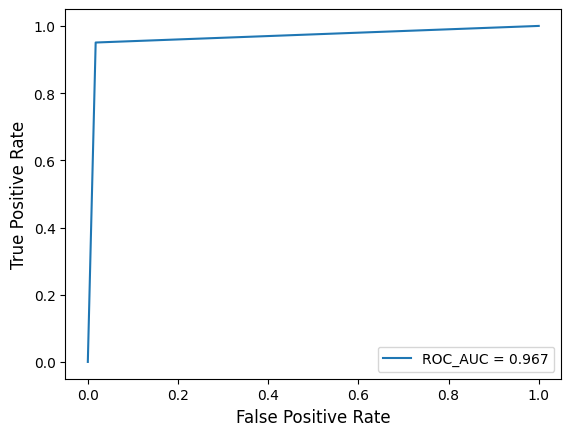

In [69]:
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print('ROC_AUC: ', roc_auc)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

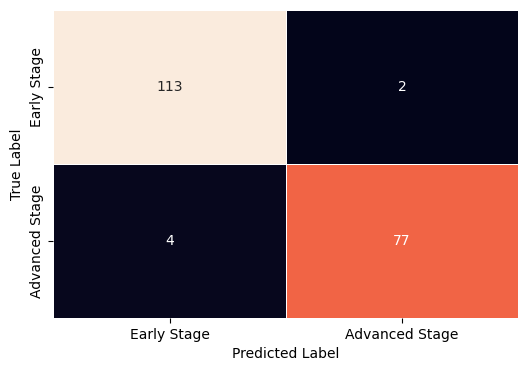

In [91]:
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Define the class labels
class_labels = ["Early Stage", "Advanced Stage"]

# Create a larger figure for better label placement
plt.figure(figsize=(6, 4))

# Create the heatmap with adjusted parameters
sns.heatmap(confusion_matrix, annot=True, fmt="d", cbar=False, linewidths=0.5)

# Set x and y tick labels
plt.xticks([0.5, 1.5], class_labels, rotation=0)
plt.yticks([0.5, 1.5], class_labels, va="center")

plt.xlabel("Predicted Label", fontsize=10)
plt.ylabel("True Label", fontsize=10)

plt.show()



# KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
clf5 = KNeighborsClassifier(n_neighbors = 4, weights = 'uniform', algorithm = 'auto', leaf_size = 2, p = 5, metric = 'minkowski')
clf5.fit(X_train, y_train)
knn_prediction = clf5.predict(X_test)

d:\code\tf\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [71]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, knn_prediction))
print(accuracy_score(y_test, knn_prediction))
print(confusion_matrix(y_test, knn_prediction))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       115
           1       0.97      0.95      0.96        81

    accuracy                           0.97       196
   macro avg       0.97      0.97      0.97       196
weighted avg       0.97      0.97      0.97       196

0.9693877551020408
[[113   2]
 [  4  77]]


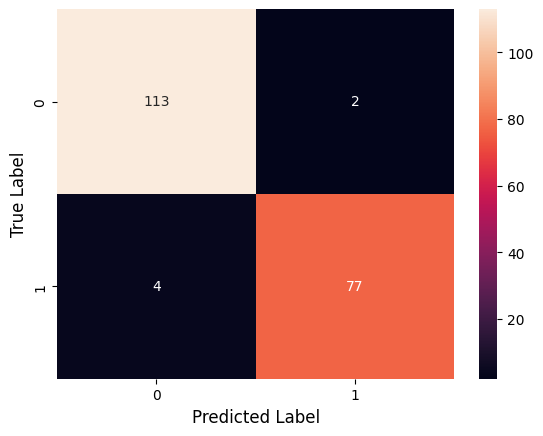

In [72]:
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(y_test, knn_prediction)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

# Decison Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

In [94]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, dt_prediction))
print(accuracy_score(y_test, dt_prediction))
print(confusion_matrix(y_test, dt_prediction))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       115
           1       0.95      0.93      0.94        81

    accuracy                           0.95       196
   macro avg       0.95      0.95      0.95       196
weighted avg       0.95      0.95      0.95       196

0.9489795918367347
[[111   4]
 [  6  75]]


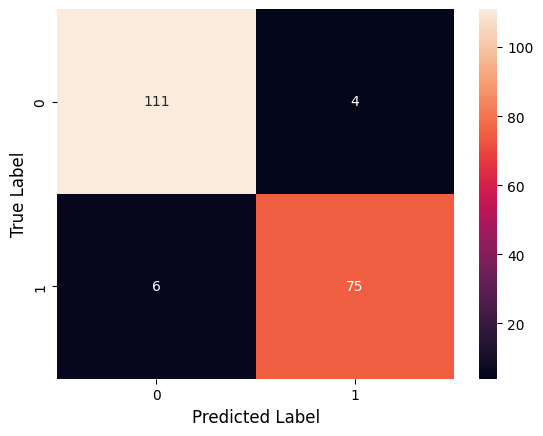

In [95]:
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(y_test, dt_prediction)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()